In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # matplot의 기본 scheme 말고 seaborn scheme 세팅 목정.
sns.set(font_scale = 2.5) # graph의 font size 일일이 지정할 필요 없게 해줌
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [4]:
df_train.head()  # 디폴트로는 맨 위 5개 데이터 보여줌. () 안에 원하는 데이터 수 쓰면 됨

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe() # 각 feature가 가진 통계치 반환

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


[ Null data check ]

In [6]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


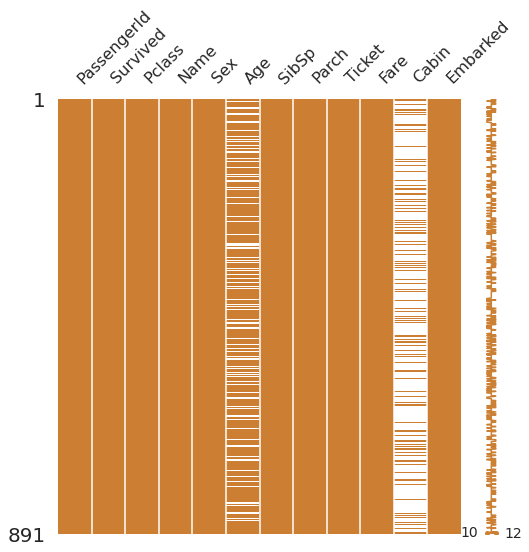

In [7]:
msno.matrix(df = df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))
 # null값 있는 부분 시각화 해줘서 null data 존재 쉽게 파악 가능

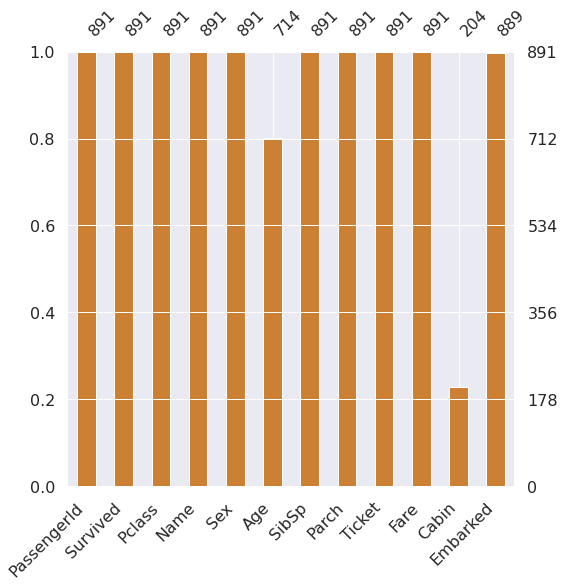

In [8]:
msno.bar(df = df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2)) # 데이터 % 막대그래프로

[ Targe label 확인 ]
- target label이 어떤 distribution 갖는 지 확인
- bi classification에서 0&1 분포에 따라 모델 평가 방법 달라질 수 있음

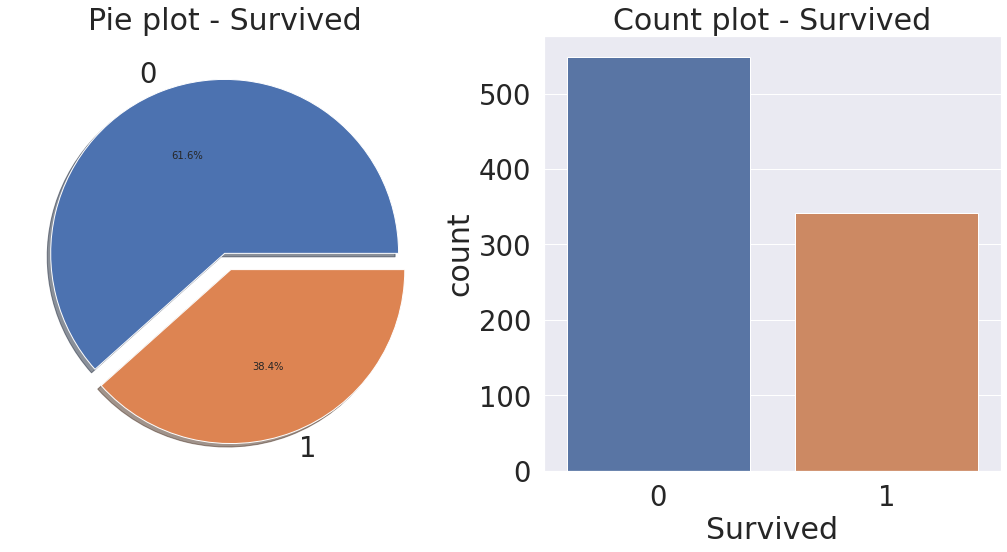

In [9]:
f, ax = plt.subplots(1,2, figsize=(18,8))  # 여기서 ax 뭔지 잘 모르겠

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0], shadow=True)
# pie 그래프가 왼쪽 비율 그래프
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
# countplot이 오른쪽 막대그래프

plt.show()
# 전체 중 살아남은 사람 비율과 숫자 시각화 가능

[ Pclass ]
- 서수형 데이터 / 카테고리이면서, 순서 있음
- 'Pclass' & 'Survived' col 두개를 pclass로 묶음
- 각 pclass 마다 0,1 count 나옴 -> 평균 내면 각 pclass 별 생존률 구할 수 있음

In [10]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()
# count() -> 각 class에 몇 명 있는지 확인 가능

,Survived
Pclass,
1,216
2,184
3,491


In [11]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()
# sum() -> 생존한(Survived=1) 사람 총합 알 수 있음

,Survived
Pclass,
1,136
2,87
3,119


In [12]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
# 좀 더 쉽게 시각화 가능
# summer- 부분은 히트맵 색깔 설정

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


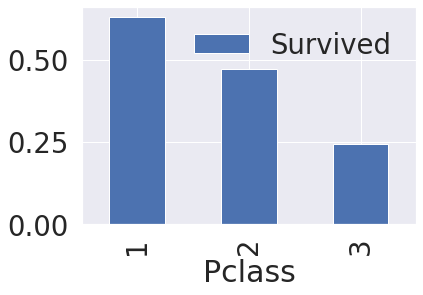

In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

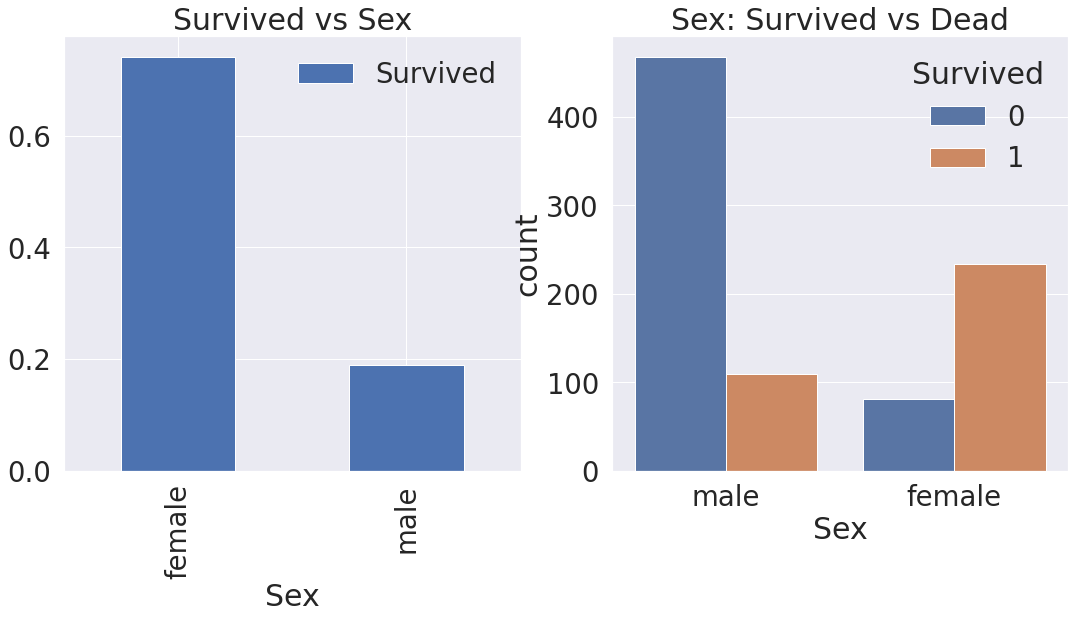

In [14]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
# groupby : sex라 x축이 성별인 듯
ax[0].set_title('Survived vs Sex')
# ax[0]이 왼쪽 그래프인 듯..?
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
# ax[1]이 오른쪽 그래프 같음

plt.show()
 
# Seaborn에서 {hue 옵션} : x츅의 값을 해당 옶션으로 세분화해서 보여줌
# 그래서 오른쪽 그래프에서 'Survived'가 0하고 1로 세분화 된 것

-> 여성의 생존률이 남성보다 높다는 것 알 수 있음


In [15]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index= False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


**->** 앞서 확인 한 Sex & Pclass feature에 따라 생존률이 어떻게 달라지는지 시각화 통해 확인

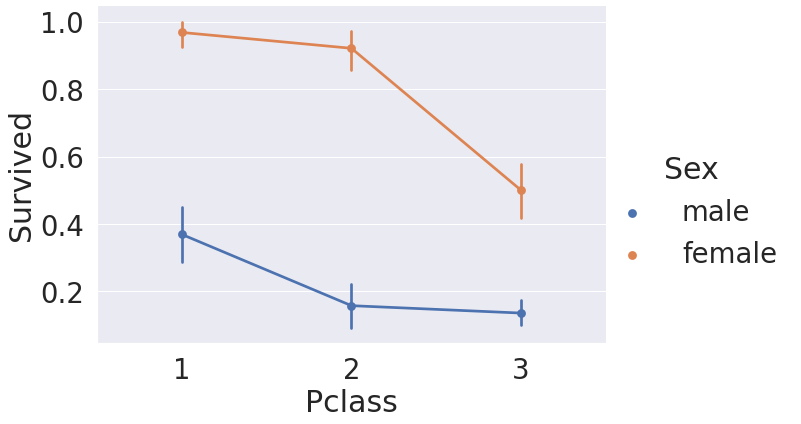

In [17]:
sns.factorplot('Pclass','Survived', hue = 'Sex', data= df_train, size=6, aspect=1.5)

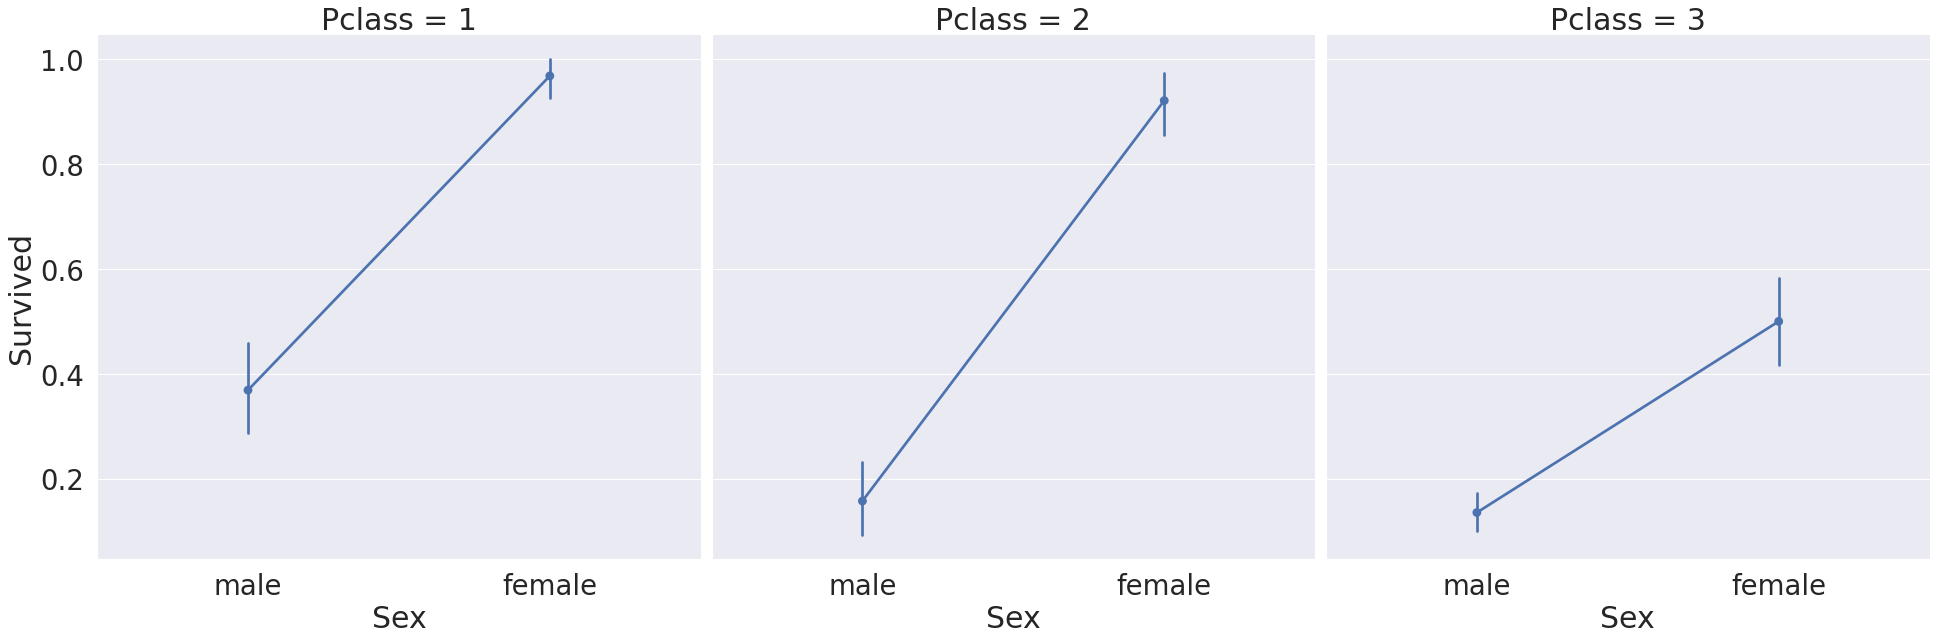

In [18]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=5, size=9, aspect=1)
# 여기서는 sex를 hue가 아니라 x축 값으로 설정하고 
# Pclass를 column으로 설정해서 Pclass별 성별에 따른 생존률 확인

**->** age feature에 딸라 생존률 어떻게 달라지나 확인

In [19]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
# .format()에서 반환하는 값이 {:.1f}에 출력
# [df_train] data set의 'Age' col값들 중에서 max값 반환하라는 뜻
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


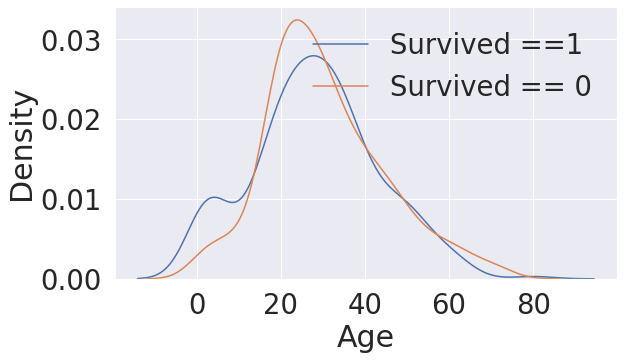

In [20]:
fig, ax = plt.subplots(1,1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived ==1', 'Survived == 0'])
plt.show()
# 아마 한 히스토그램에 동시에 표시하려고 ax[0], ax[1] 이렇게 안 나눈 듯

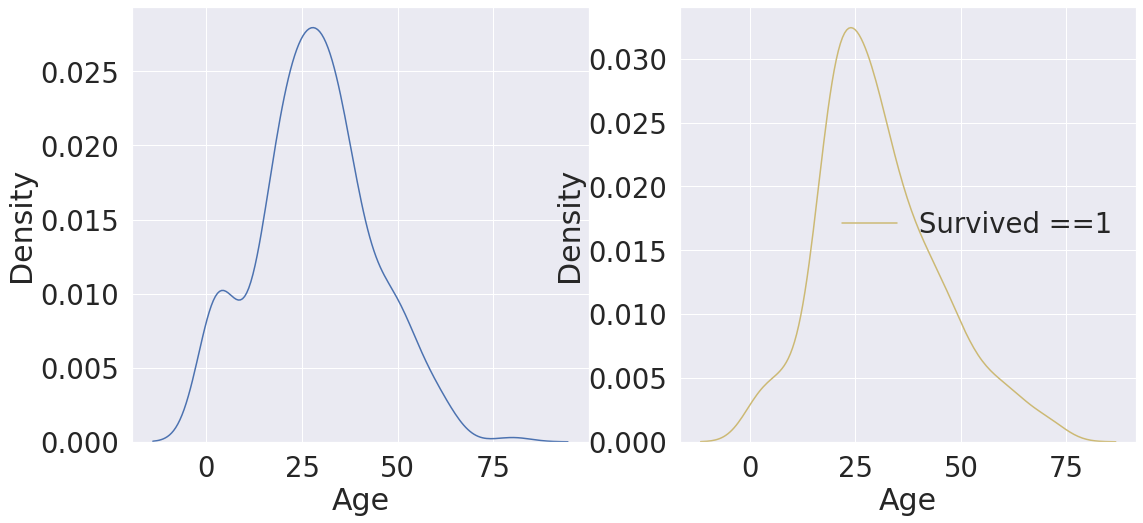

In [21]:
fig, ax = plt.subplots(1,2, figsize=(18, 8))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax[0])
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],color= 'y', ax=ax[1])
plt.legend(['Survived ==1', 'Survived == 0'])
plt.show()
# 이렇게 하면 두 그래프 따로 나눠서 보여줌. -> 비교하기엔 불리

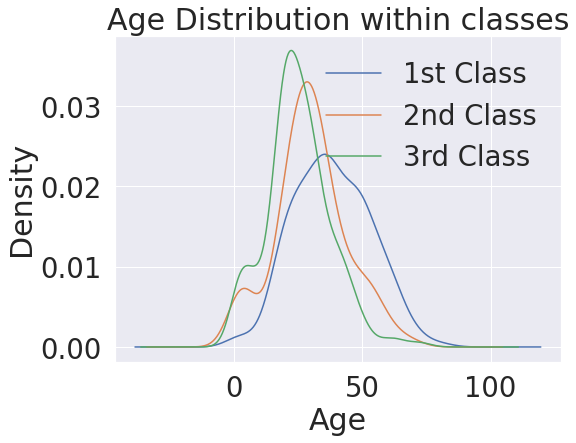

In [22]:
# Age distribution withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')
# kde는 '선' 표현, hist '막대' 표현

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

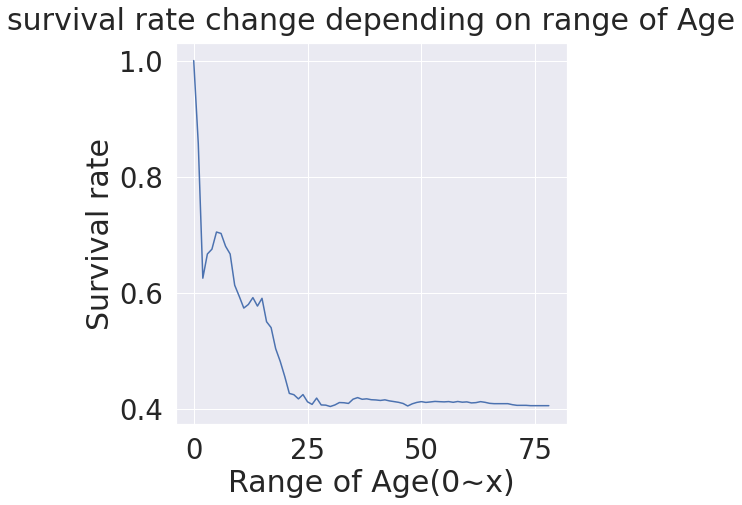

In [23]:
cummulate_survival_ratio = []
for i in range(1,80):
  cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)   
plt.title('survival rate change depending on range of Age', y=1.02)      
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')                 
plt.show()                                                            

**->** 지금까지 봤던 sex, Pclass, age 모두에 대해 시각화 ; **violinplot**

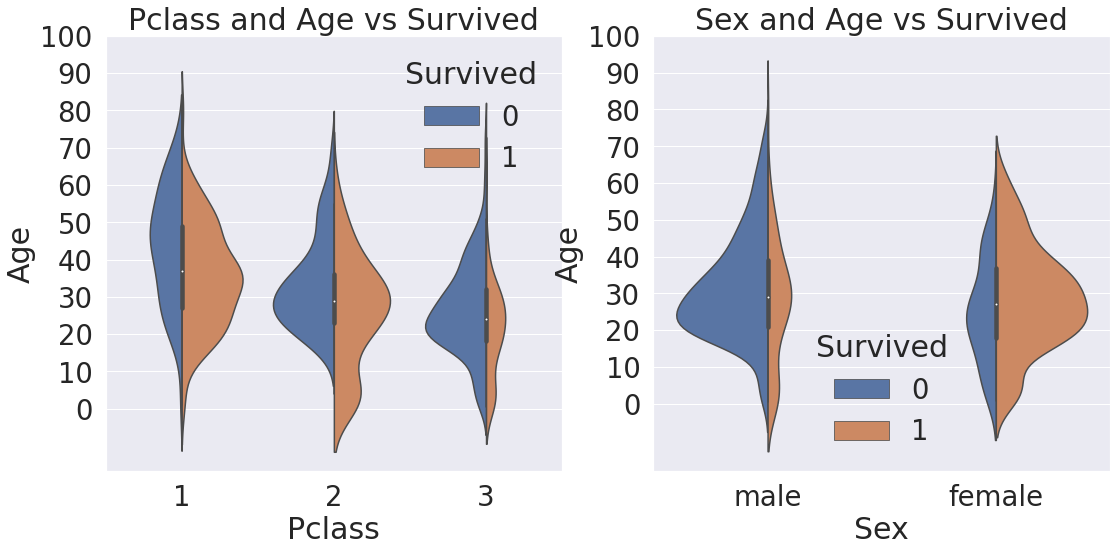

In [24]:
f, ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

[ embarked ; 탑승 항구 ]

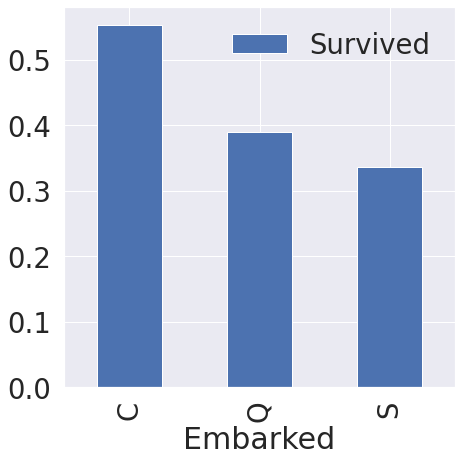

In [25]:
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

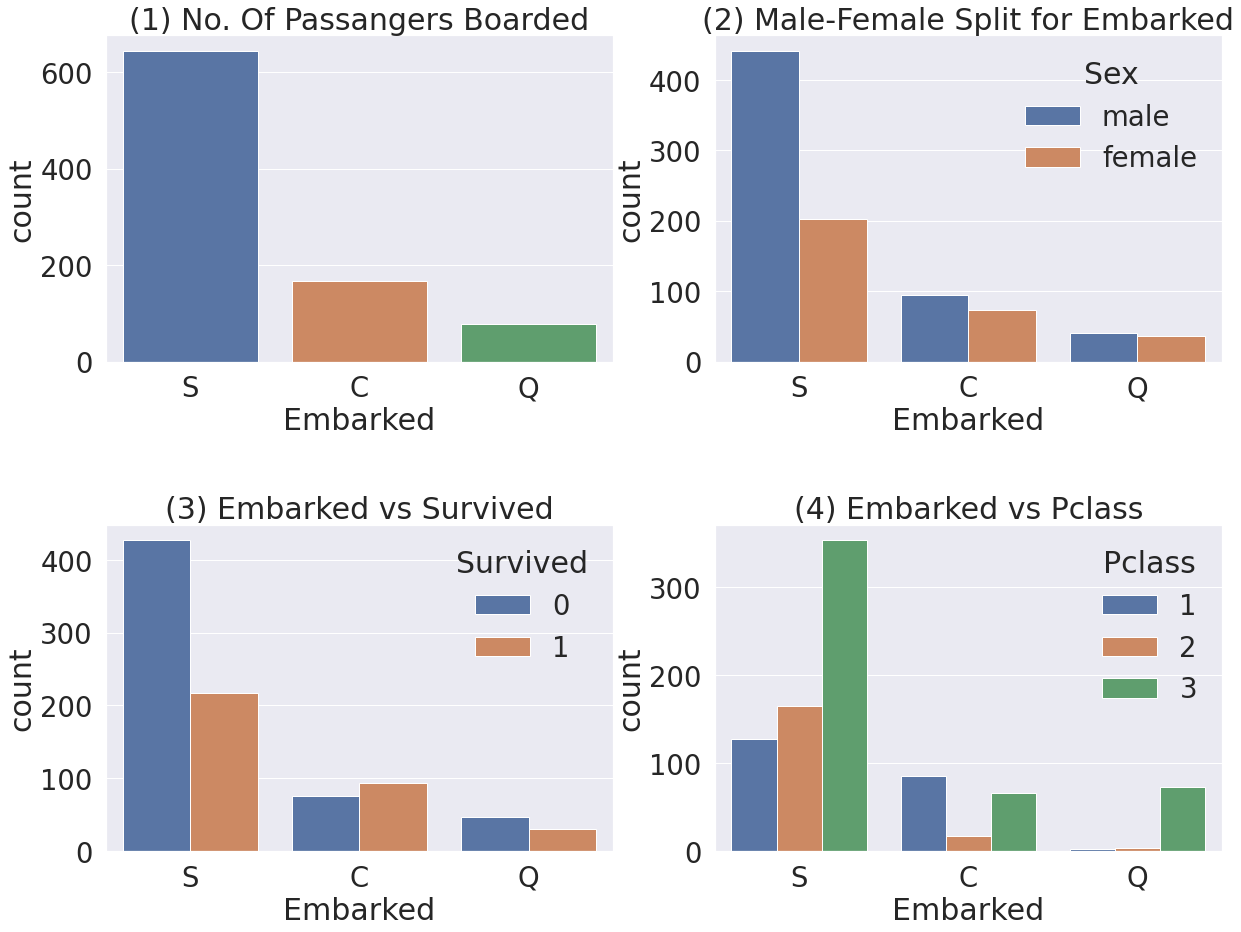

In [26]:
f, ax=plt.subplots(2,2,figsize=(20,15))
# subplots(A,B, figsize) 에서 AxB(col) matrix 형태로 그래프 나타내라는 의미인 듯 

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passangers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

[ Family - SibSp(형제자매) + Parch(부모자녀) ]

In [27]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
# 자기 자신 있으니까 (+1) 해줌

print("Maximum size of Family : ", df_train['FamilySize'].max())
print("Minimum size of Family : ", df_train['FamilySize'].min())

Maximum size of Family :  11
Minimum size of Family :  1


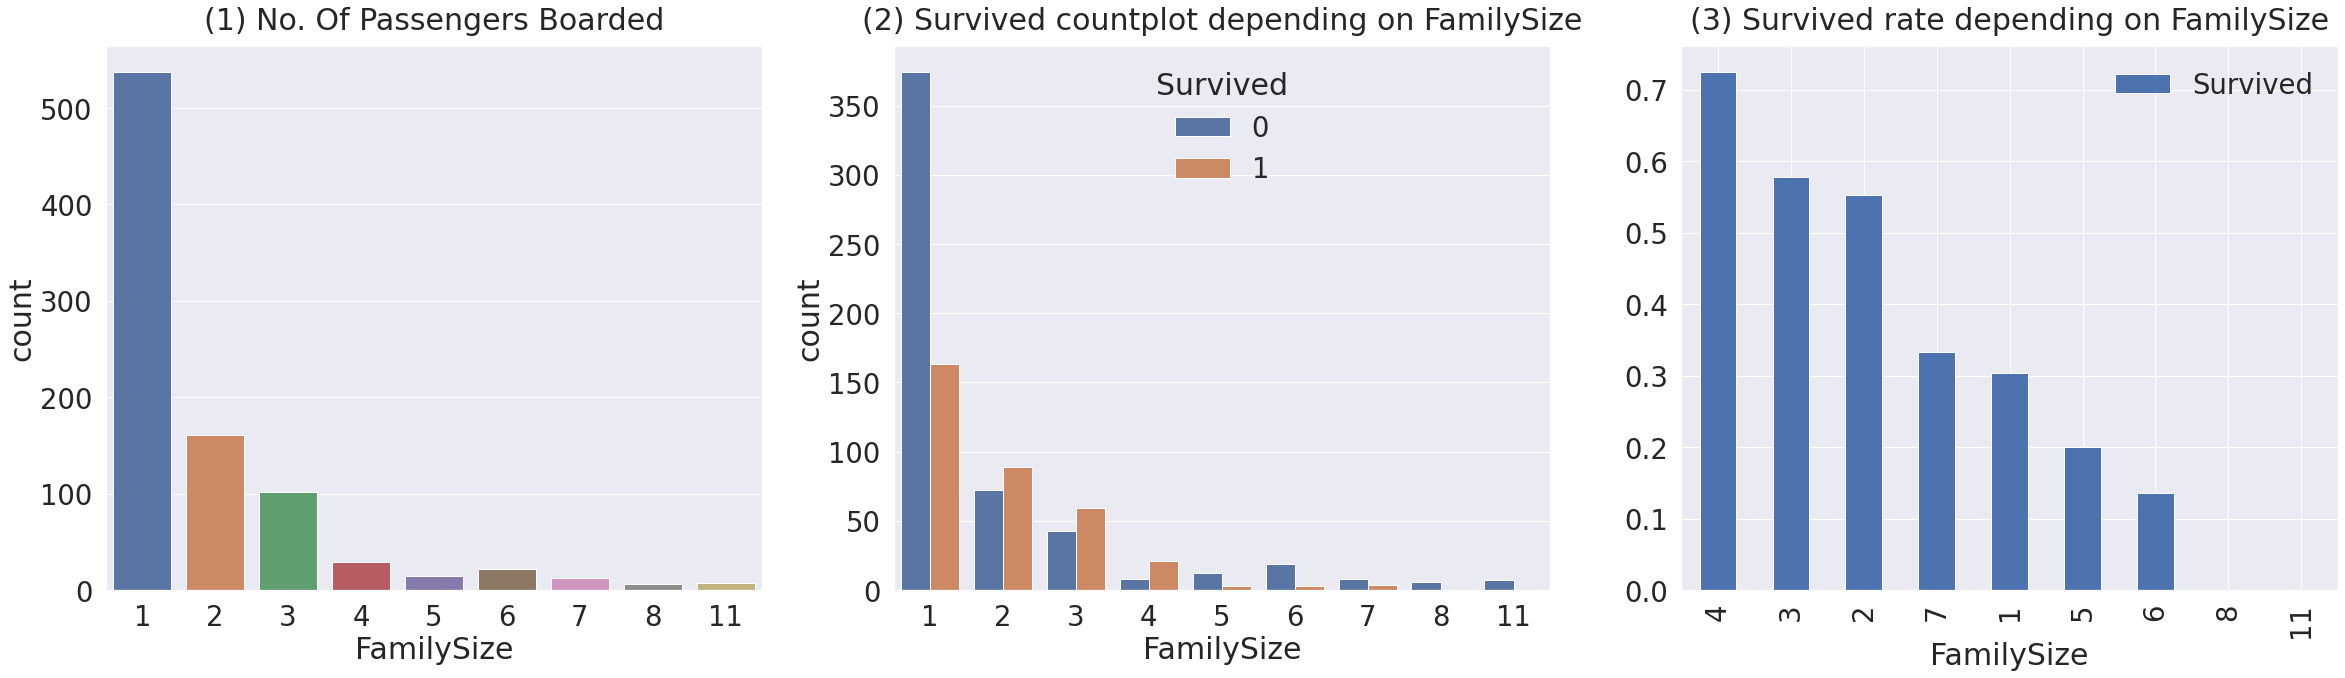

In [28]:
f, ax=plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

[ Fare ; 탑승 요금 ]

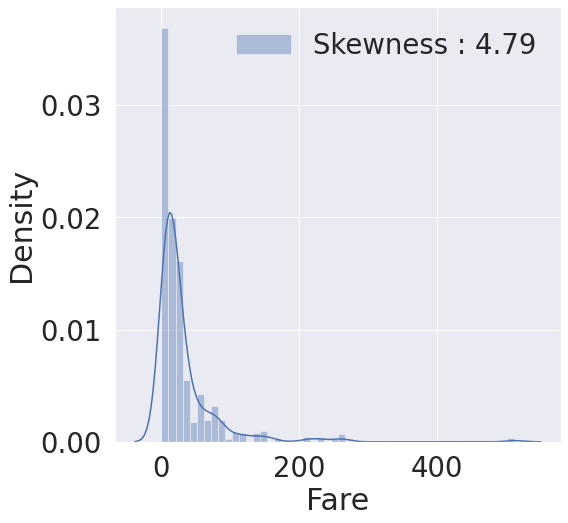

In [29]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

= fare 값 distribution이 비대칭 적임 ; 보통 200 안쪽
-> high skewness : outlier 과민 반응할 수 있으니 log 취해서 영향 줄여줌
; pandas의 map / apply 이용

In [30]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
# testset에 있는 nan value 값을 평균값으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)


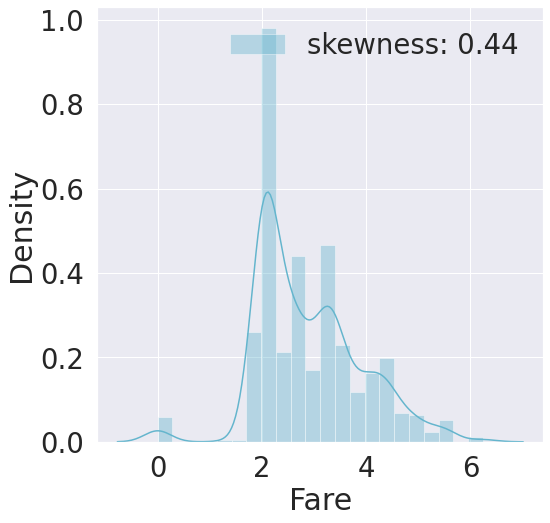

In [31]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='c', label='skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc = 'best')

=  비교적 비대칭성이 완화되어 가운데에 데이터 많이 몰려있는 것 볼 수 있음

[ cabin ]  -> NaN 값 80%나 되기 때문에 그냥 모델에 포함시키지 않음

In [32]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


[ ticket ] ; string(문자열) data이므로 추가작업 이후에 모델에 적용 가능

In [33]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

[ Feature Engineering ]

-> NULL 데이터 채우기 ; train & test 똑같이 적용

In [34]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')
# extract the Salutations(인사말이라는데 이니셜을 추출해서 인사말이라 한 것 아닐까 함)

In [38]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')
# 추출한 이니셜(Mr/Miss/Mrs)과 Sex 간의 상관관계 파악

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [40]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)
# inplace 옵션이 True이면,  명령어를 실행 한 후 메소드가 적용된 데이터 프레임으로 반환
# inplace = False 옵션이면 그냥 클립보드 저장 상태. 다른 변수에 담아주던가 해야 함

In [41]:
df_train.groupby('Initial').mean()
# train data를 Initial 기준으로 분류함

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


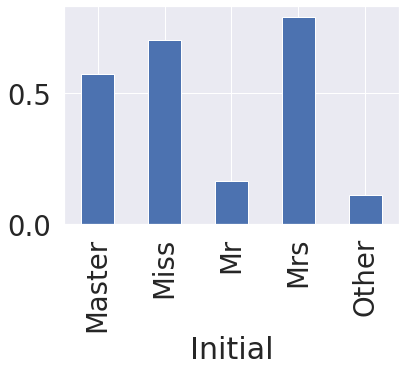

In [42]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()
# initial 기준 생존률 막대그래프로 표시

In [43]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [44]:
# isnull() 이면서 intitial이 A인 탑승객(row)의 'Age' n 으로 치환한다는 의미
# df_train.loc : train data에서 특정 행/열을 추출하겠다는 뜻
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [45]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')
df_train['Embarked'].fillna('S', inplace=True)
# S 정박지 탑승객이 가장 많았으므로 NaN값 S로 채움

Embarked has  2  Null values


-> Change Age ; continuous to categorical

In [46]:
# .loc 이용하느 방법
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [47]:
# 함수 만들어 apply 메소드에 넣어주는 방법
def category_age(x):
  if x < 10:
    return 0
  elif x < 20 :
    return 1
  elif x < 30:
        return 2
  elif x < 40:
        return 3
  elif x < 50:
        return 4
  elif x < 60:
        return 5
  elif x < 70:
        return 6
  else:
        return 7    

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

-> 앞의 두 방법 결과 같은지 확인하기 위해 series 간 boolean 비교 후 all() 메소드 이용.  all() ; 두 다 T여야 결과도 T

In [48]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->  True


In [49]:
# 중복되는 Age_cat & Age column 제거
df_train.drop(['Age', 'Age_cat_2'], axis = 1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

[ 카테고리 데이터 모델 인풋으로 넣기 위해 수치화 시키기 ; .map() ]
##### Initial / Embarked / Sex

In [52]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
# Initial에 숫자 mapping 0~4

In [53]:
df_train['Embarked'].unique() # 어떤 값 있는지 간단ver.

array(['S', 'C', 'Q'], dtype=object)

In [54]:
df_train['Embarked'].value_counts() # 어떤 값 있는지 상세ver.

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [55]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [56]:
df_train['Embarked'].isnull().any()
# any() : isnull()이 하나라도 있으면 T

False

In [57]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

[ Feature 간 상관 관계 파악하기 ; heatmap plot ]

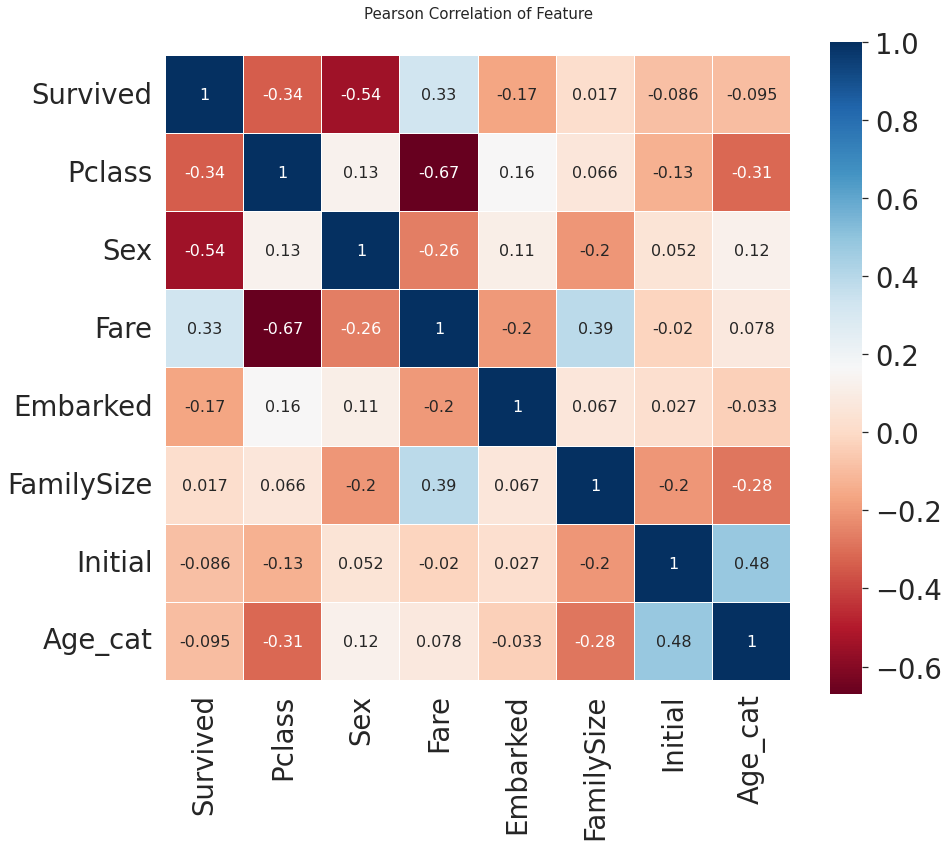

In [61]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Feature', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":16})

del heatmap_data

[ One-hot Encoding -> Initial & Embarked ]
##### 수치화 시킨 카테고리 0/1로 다시 변환

In [62]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')
# Initial column 해당 사항 0/1로 표현 -> 새로은 col 5개 추가됨

In [63]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [64]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

[ Drop Column ; 필요한 col만 남기고 나머지 지우기 ]

In [65]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [66]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [67]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


[ 머신 러닝 모델 만들기 ; sklearn ]

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # 모델 평가 위해서
from sklearn.model_selection import train_test_split # training set 쉽게 나눠주는 함수

-> Dataset { train, valid, test }로 쪼개기

In [70]:
x_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
x_test = df_test.values

In [71]:
x_tr, x_vld, y_tr, y_vld = train_test_split(x_train, target_label, test_size=0.3, random_state=2018)
# random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값
#  -> 이값 고정해야 매번 데이터셋 바뀌는 것 방지 할 수 있음

In [72]:
# 모델 만들고 예측까지 끝냄
model = RandomForestClassifier()
model.fit(x_tr, y_tr)
prediction = model.predict(x_vld)

In [73]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 83.21% 정확도로 생존을 맞춤


-> 모델이 어떤 feature에 가장 큰 영향 받았는지 파악 가능; pandas series

In [74]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

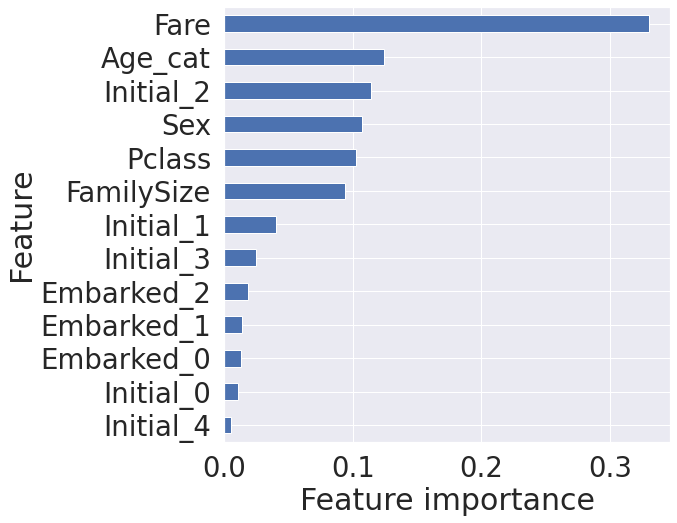

In [75]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

[ Test set에서 예측 ]

In [ ]:
submission = pd.read_csv()
submission.head()

In [76]:
prediction = model.predict(x_test)
submission['Survived'] = prediction

In [ ]:
submission.to_csv('.\my_first_submission.csv', index=False)